In [583]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Load the data from the CSV file
df = pd.read_csv('airbnb_New York.csv')

# Select the desired columns
selected_columns = ['Airbnb Property ID', 'superhost_period_all','host_is_superhost_in_period','prev_host_is_superhost_in_period', 'numCancel_pastYear',
       'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
       'hostResponseAverage_pastYear', 'available_days_aveListedPrice', 'Pets Allowed',
       'Property Type', 'Listing Type', 'Zipcode', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
       'Instantbook Enabled', 'Nightly Rate',
       'Number of Reviews', 'Rating Overall', 'occupancy_rate',
       'zip_total_population', 'zip_hispanic_or_latino_anyrace_percent',
       'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
       'zip_asian_nothispanic_percent','rating_ave_pastYear', 'numReviews_pastYear', 'numReservedDays_pastYear', 'prev_revenue','prev_occupancy_rate','tract_prev_superhosts','tract_prev_superhosts_ratio','prev_Rating Overall','prev_Number of Reviews','prev_Nightly Rate']

# Create a new dataframe with selected columns
data = df[selected_columns]
print(data.shape)
# Display the first few rows of the new dataframe
print("First 5 rows of the new dataframe:")
data.shape

# Explore other analysis tasks with the new dataframe as needed...


<ipython-input-583-0acc4d35a5ab>:5: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_New York.csv')


(437583, 39)
First 5 rows of the new dataframe:


(437583, 39)

In [584]:
Threshold_rating_jm = 0.7
Threshold_trips_jm = 8
Threshold_rr_jm = 80
Threshold_cr_jm = 5

Threshold_rating_jp = 0.9
Threshold_trips_jp = 12
Threshold_rr_jp = 95


In [585]:
p1 = 10
p2 = 11
p3 = 12

In [586]:
data_10 = data[
    (data['prop_5_StarReviews_pastYear'] >= Threshold_rating_jm) &
    (data['numReserv_pastYear'] >= Threshold_trips_jm) &
    (data['hostResponseAverage_pastYear'] >= Threshold_rr_jm) &
    (data['numCancel_pastYear'] <= Threshold_cr_jm) &
    (data['host_is_superhost_in_period'] == 0) &
    (data['superhost_period_all'] == p1)
]


In [587]:
data_10.shape

(5843, 39)

In [588]:
data_11thperiod_jm = data[(
    (data['prop_5_StarReviews_pastYear'] >= Threshold_rating_jm) &
    (data['numReserv_pastYear'] >= Threshold_trips_jm) &
    (data['hostResponseAverage_pastYear'] >= Threshold_rr_jm) &
    (data['numCancel_pastYear'] <= Threshold_cr_jm) &
    (data['host_is_superhost_in_period'] == 0)&
    (data['superhost_period_all'] == p2)
)]
data_11thperiod_jm['treatment'] = 0

data_11thperiod_jp = data[
    ((data['prop_5_StarReviews_pastYear'] <= Threshold_rating_jp) |
    (data['numReserv_pastYear'] <= Threshold_trips_jp) |
    (data['hostResponseAverage_pastYear'] <= Threshold_rr_jp)) &
    (data['host_is_superhost_in_period'] == 1)&
    (data['superhost_period_all'] == p2)
]
data_11thperiod_jp['treatment'] = 1

data_11 = pd.concat([data_11thperiod_jm, data_11thperiod_jp], axis=0, ignore_index=True)
print(data_11thperiod_jm.shape)
print(data_11thperiod_jp.shape)

(5789, 40)
(2582, 40)


<ipython-input-588-18edf1d2dbfd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11thperiod_jm['treatment'] = 0
<ipython-input-588-18edf1d2dbfd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_11thperiod_jp['treatment'] = 1


In [589]:
# Merge the two DataFrames based on 'Airbnb Property ID'
data_10 = pd.merge(data_10, data_11[['Airbnb Property ID', 'treatment']], on='Airbnb Property ID', how='left')


In [590]:
common_property_ids = pd.Series(list(set(data_11['Airbnb Property ID']).intersection(set(data_10['Airbnb Property ID']))))
# Filter both dataframes to only include rows with common Property_IDs

df1_filtered = data_11[data_11['Airbnb Property ID'].isin(common_property_ids)]
df2_filtered = data_10[data_10['Airbnb Property ID'].isin(common_property_ids)]
# Concatenate the data frames
df = pd.concat([df1_filtered, df2_filtered])

In [591]:
df.shape

(8418, 40)

In [592]:
df['period'] = df['superhost_period_all'].map({p1: 0, p2: 1})

In [593]:
df = df.dropna()

df.shape

(4400, 41)

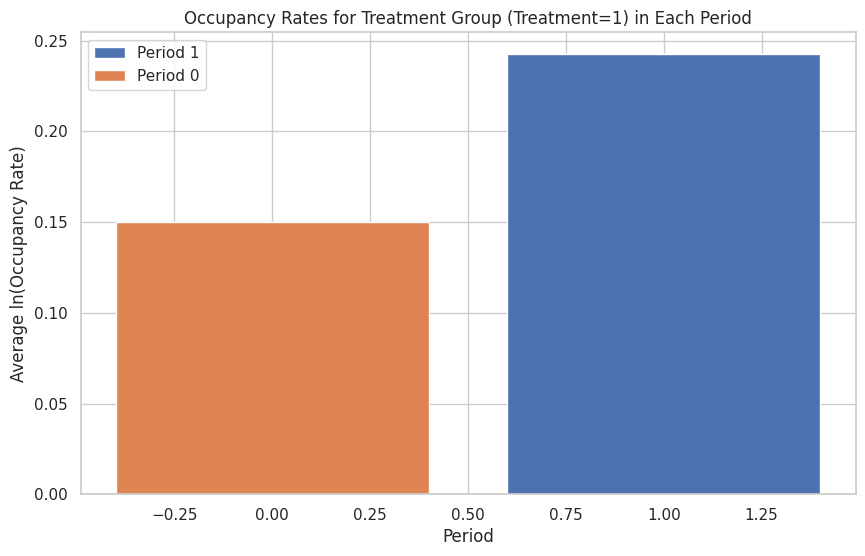

In [594]:
import matplotlib.pyplot as plt

# Filter rows where treatment column is equal to 1
treatment_df = df[df['treatment'] == 1]

# Create a bar chart for occupancy rates for each period
plt.figure(figsize=(10, 6))
for period in df['period'].unique():
    period_data = treatment_df[treatment_df['period'] == period]
    plt.bar(period, np.log1p(period_data['occupancy_rate']).mean(), label=f'Period {period}')

plt.title('Occupancy Rates for Treatment Group (Treatment=1) in Each Period')
plt.xlabel('Period')
plt.ylabel('Average ln(Occupancy Rate)')
plt.legend()
plt.show()


In [595]:
# Filter rows where superhost_period_all equals 12
data_12 = data[data['superhost_period_all'] == p3]

In [596]:
data_12.head()

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,prev_revenue,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate
8,2515,12,0,0,1.0,0.800000,181.0,88.109091,94.088372,False,...,4.766667,60.0,812.0,NaN,NaN,27,0.169811,92.0,163.0,119.000000
17,2539,12,1,1,0.0,0.860465,66.0,100.000000,139.489796,False,...,4.837209,43.0,365.0,NaN,NaN,3,0.078947,97.0,7.0,70.666667
29,2595,12,0,0,0.0,0.846154,19.0,84.244444,218.285714,False,...,4.769231,13.0,67.0,3706.0,0.072340,4,0.088889,97.0,29.0,309.333333
39,3330,12,0,0,0.0,0.850000,34.0,88.250000,79.657143,False,...,4.550000,20.0,273.0,490.0,0.074468,21,0.107692,97.0,27.0,195.000000
49,3647,12,0,0,NaN,NaN,0.0,NaN,150.000000,False,...,NaN,NaN,0.0,NaN,NaN,18,0.141732,NaN,0.0,225.000000


In [597]:
# Check for duplicate values in 'Airbnb Property ID' in data_11 or data_12
duplicate_ids_11 = data_11['Airbnb Property ID'].duplicated()
duplicate_ids_12 = data_12['Airbnb Property ID'].duplicated()

# Merge df with data_11 and data_12 based on 'Airbnb Property ID'
merged_df = pd.merge(df, data_11[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_11'))
merged_df = pd.merge(merged_df, data_12[['Airbnb Property ID', 'occupancy_rate']], on='Airbnb Property ID', how='left', suffixes=('', '_12'))

# Create a new column 'occupancy_rate_next' in df based on the values from data_11 and data_12
df['occupancy_rate_next'] = None  # Initialize the column with None

# Reset the index to avoid non-unique column names issue
merged_df = merged_df.reset_index(drop=True)
df = df.reset_index(drop=True)

# Rename columns to make them unique
merged_df = merged_df.rename(columns={'occupancy_rate_11': 'occupancy_rate_11', 'occupancy_rate_12': 'occupancy_rate_12'})

# Convert the 'occupancy_rate_next' column to float
df['occupancy_rate_next'] = pd.to_numeric(merged_df['occupancy_rate_11'], errors='coerce').where(df['period'] == 0, pd.to_numeric(merged_df['occupancy_rate_12'], errors='coerce'))


In [598]:

# Print the updated DataFrame
df = df.dropna()


In [599]:
df.shape

(3633, 42)

In [600]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'occupancy_rate', 'period', 'treatment' are column names
# Create the interaction term
df['interaction_term'] = df['period'] * df['treatment']

# Separate features (X) and target variable (y)
# X = df[['period', 'treatment', 'interaction_term', 'numCancel_pastYear',
#        'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
#        'hostResponseAverage_pastYear','rating_ave_pastYear', 'numReviews_pastYear', 'prev_occupancy_rate','prev_revenue', 'numReservedDays_pastYear','Property Type','Pets Allowed','prev_Rating Overall','prev_Number of Reviews','prev_Nightly Rate']]

X = df[['period', 'treatment', 'interaction_term', 'numCancel_pastYear',
       'prop_5_StarReviews_pastYear', 'numReserv_pastYear',
       'hostResponseAverage_pastYear', 'Property Type','Pets Allowed','prev_Number of Reviews', 'Bedrooms', 'Bathrooms',
       'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
       'Instantbook Enabled', 'Nightly Rate',
       'Number of Reviews', 'Rating Overall', 'zip_total_population', 'zip_hispanic_or_latino_anyrace_percent',
       'zip_white_nothispanic_percent', 'zip_black_nothispanic_percent',
       'zip_asian_nothispanic_percent']]

X = pd.get_dummies(X, columns=['Pets Allowed', 'Property Type'])
# y = df[['occupancy_rate_next']]
y = np.log1p(df[['occupancy_rate']])

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     21.64
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.18e-149
Time:                        20:23:34   Log-Likelihood:                 2982.8
No. Observations:                3633   AIC:                            -5876.
Df Residuals:                    3588   BIC:                            -5597.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

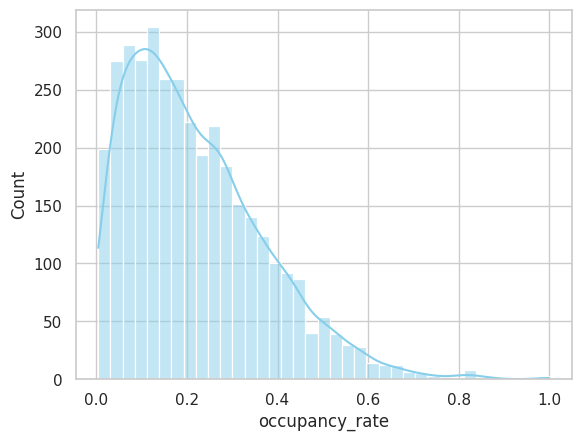

In [601]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a distribution plot using seaborn
sns.histplot(df['occupancy_rate'], kde=True, color="skyblue")

# Show the plot
plt.show()


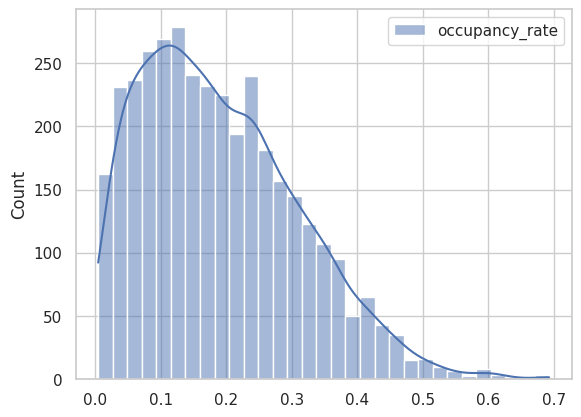

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a distribution plot using seaborn
sns.histplot(np.log1p(df[['occupancy_rate']]), kde=True, color="skyblue")

# Show the plot
plt.show()


In [603]:
df_sorted = df.sort_values(by='Airbnb Property ID')

# Print the head of the sorted DataFrame
df_sorted.head()

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate,treatment,period,occupancy_rate_next,interaction_term
0,3330,11,0,0,0.0,0.869565,31.0,88.218750,82.468085,False,...,0.137097,22,0.108911,97.0,26.0,195.0,0.0,1,0.300000,0.0
2076,3330,10,0,0,0.0,0.764706,16.0,83.050000,74.491935,False,...,0.240506,22,0.121547,96.0,24.0,192.5,0.0,0,0.074468,0.0
2077,5238,10,0,0,0.0,0.753247,251.0,95.222222,119.756098,False,...,0.276423,5,0.032895,93.0,141.0,180.0,0.0,0,0.550000,0.0
1,5238,11,0,0,0.0,0.716216,273.0,94.514706,125.687500,False,...,0.134146,31,0.185629,93.0,144.0,180.0,0.0,1,0.363636,0.0
2,5295,11,0,0,0.0,1.000000,10.0,96.600000,135.967742,False,...,0.072289,12,0.077922,94.0,36.0,195.0,0.0,1,0.417910,0.0


In [607]:
data_10_1 = data_10[['Airbnb Property ID','superhost_period_all','host_is_superhost_in_period']]
data_10_1.head()

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period
0,3330,10,0
1,5238,10,0
2,5295,10,0
3,5945,10,0
4,7816,10,0


In [604]:
df.iloc[0:20].head()

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate,treatment,period,occupancy_rate_next,interaction_term
0,3330,11,0,0,0.0,0.869565,31.0,88.218750,82.468085,False,...,0.137097,22,0.108911,97.0,26.0,195.0,0.0,1,0.300000,0.0
1,5238,11,0,0,0.0,0.716216,273.0,94.514706,125.687500,False,...,0.134146,31,0.185629,93.0,144.0,180.0,0.0,1,0.363636,0.0
2,5295,11,0,0,0.0,1.000000,10.0,96.600000,135.967742,False,...,0.072289,12,0.077922,94.0,36.0,195.0,0.0,1,0.417910,0.0
3,8024,11,0,0,1.0,0.711538,109.0,99.712871,120.025773,False,...,0.083770,7,0.142857,93.0,102.0,130.0,0.0,1,0.094675,0.0
4,8025,11,0,0,1.0,0.711538,109.0,99.712871,100.760870,False,...,0.012658,7,0.142857,94.0,26.0,120.0,0.0,1,0.009901,0.0


In [605]:
df_sorted = data_11.sort_values(by='Airbnb Property ID')

df_sorted['treatment'] = df_sorted['treatment'].replace({1: 'just_pass', 0: 'just_fail'})
df_sorted = df_sorted.rename(columns={'treatment': 'just_miss/just_pass'})
df_sorted.head()


,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,numReviews_pastYear,numReservedDays_pastYear,prev_revenue,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate,just_miss/just_pass
0,2515,11,0,0,1.0,0.750000,174.0,89.140000,89.595745,False,...,56.0,774.0,2172.0,0.175439,24,0.140351,92.0,158.0,119.0,just_fail
5789,2539,11,1,1,0.0,0.857143,59.0,100.000000,114.640496,False,...,42.0,311.0,NaN,NaN,3,0.076923,97.0,7.0,78.5,just_pass
1,2595,11,0,0,0.0,0.777778,16.0,85.441176,216.676596,False,...,9.0,62.0,4116.0,0.078261,2,0.037037,98.0,26.0,325.5,just_fail
2,3330,11,0,0,0.0,0.869565,31.0,88.218750,82.468085,False,...,23.0,240.0,1280.0,0.137097,22,0.108911,97.0,26.0,195.0,just_fail
3,5172,11,0,0,1.0,0.700000,15.0,100.000000,138.259542,False,...,10.0,87.0,NaN,NaN,10,0.057471,93.0,63.0,209.0,just_fail


In [606]:
selected_df = df_sorted[['Airbnb Property ID', 'superhost_period_all', 'just_miss/just_pass']]

selected_df.head()

,Airbnb Property ID,superhost_period_all,just_miss/just_pass
0,2515,11,just_fail
5789,2539,11,just_pass
1,2595,11,just_fail
2,3330,11,just_fail
3,5172,11,just_fail


In [626]:
df.iloc[0:5]

,Airbnb Property ID,superhost_period_all,host_is_superhost_in_period,prev_host_is_superhost_in_period,numCancel_pastYear,prop_5_StarReviews_pastYear,numReserv_pastYear,hostResponseAverage_pastYear,available_days_aveListedPrice,Pets Allowed,...,prev_occupancy_rate,tract_prev_superhosts,tract_prev_superhosts_ratio,prev_Rating Overall,prev_Number of Reviews,prev_Nightly Rate,treatment,period,occupancy_rate_next,interaction_term
0,3330,11,0,0,0.0,0.869565,31.0,88.218750,82.468085,False,...,0.137097,22,0.108911,97.0,26.0,195.0,0.0,1,0.300000,0.0
1,5238,11,0,0,0.0,0.716216,273.0,94.514706,125.687500,False,...,0.134146,31,0.185629,93.0,144.0,180.0,0.0,1,0.363636,0.0
2,5295,11,0,0,0.0,1.000000,10.0,96.600000,135.967742,False,...,0.072289,12,0.077922,94.0,36.0,195.0,0.0,1,0.417910,0.0
3,8024,11,0,0,1.0,0.711538,109.0,99.712871,120.025773,False,...,0.083770,7,0.142857,93.0,102.0,130.0,0.0,1,0.094675,0.0
4,8025,11,0,0,1.0,0.711538,109.0,99.712871,100.760870,False,...,0.012658,7,0.142857,94.0,26.0,120.0,0.0,1,0.009901,0.0
